<a href="https://colab.research.google.com/github/GoldenWind8/AlgorithmicTrading/blob/master/DataVisualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

from sklearn import preprocessing
import seaborn as sns

In [ ]:
data_frame = pd.read_csv('EURCAD.csv')
data_frame.head()

,Date,Timestamp,Open,High,Low,Close,Volume
0,20221129,00:00:00,1.39524,1.39531,1.39521,1.39531,61.859999
1,20221129,00:00:10,1.39531,1.39533,1.39529,1.39529,31.319999
2,20221129,00:00:20,1.39529,1.39531,1.39526,1.39531,24.240000
3,20221129,00:00:30,1.39528,1.39532,1.39528,1.39532,12.840000
4,20221129,00:00:40,1.39532,1.39534,1.39526,1.39531,48.139999


In [ ]:
print('The number of samples into the train data is {}.'.format(data_frame.shape[0]))

The number of samples into the train data is 181345.


In [ ]:
#Create date time column!
data_frame['Date'] = data_frame['Date'].astype(str)
data_frame['Datetime'] = pd.to_datetime(data_frame['Date'] + data_frame['Timestamp'], format='%Y%m%d%H:%M:%S')

data_frame.head()

,Date,Timestamp,Open,High,Low,Close,Volume,Datetime
0,20221129,00:00:00,1.39524,1.39531,1.39521,1.39531,61.859999,2022-11-29 00:00:00
1,20221129,00:00:10,1.39531,1.39533,1.39529,1.39529,31.319999,2022-11-29 00:00:10
2,20221129,00:00:20,1.39529,1.39531,1.39526,1.39531,24.240000,2022-11-29 00:00:20
3,20221129,00:00:30,1.39528,1.39532,1.39528,1.39532,12.840000,2022-11-29 00:00:30
4,20221129,00:00:40,1.39532,1.39534,1.39526,1.39531,48.139999,2022-11-29 00:00:40


In [ ]:
data_frame['DateIndex'] = pd.to_datetime(data_frame['Datetime']).astype(np.int64)
data_frame.set_index(['Datetime'], inplace=True)
data = data_frame.filter(['Close'])
data.head()

<ipython-input-15-3c752befd0aa>:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  data_frame['DateIndex'] = pd.to_datetime(data_frame['Datetime']).astype(np.int64)


,Close
Datetime,
2022-11-29 00:00:00,1.39531
2022-11-29 00:00:10,1.39529
2022-11-29 00:00:20,1.39531
2022-11-29 00:00:30,1.39532
2022-11-29 00:00:40,1.39531


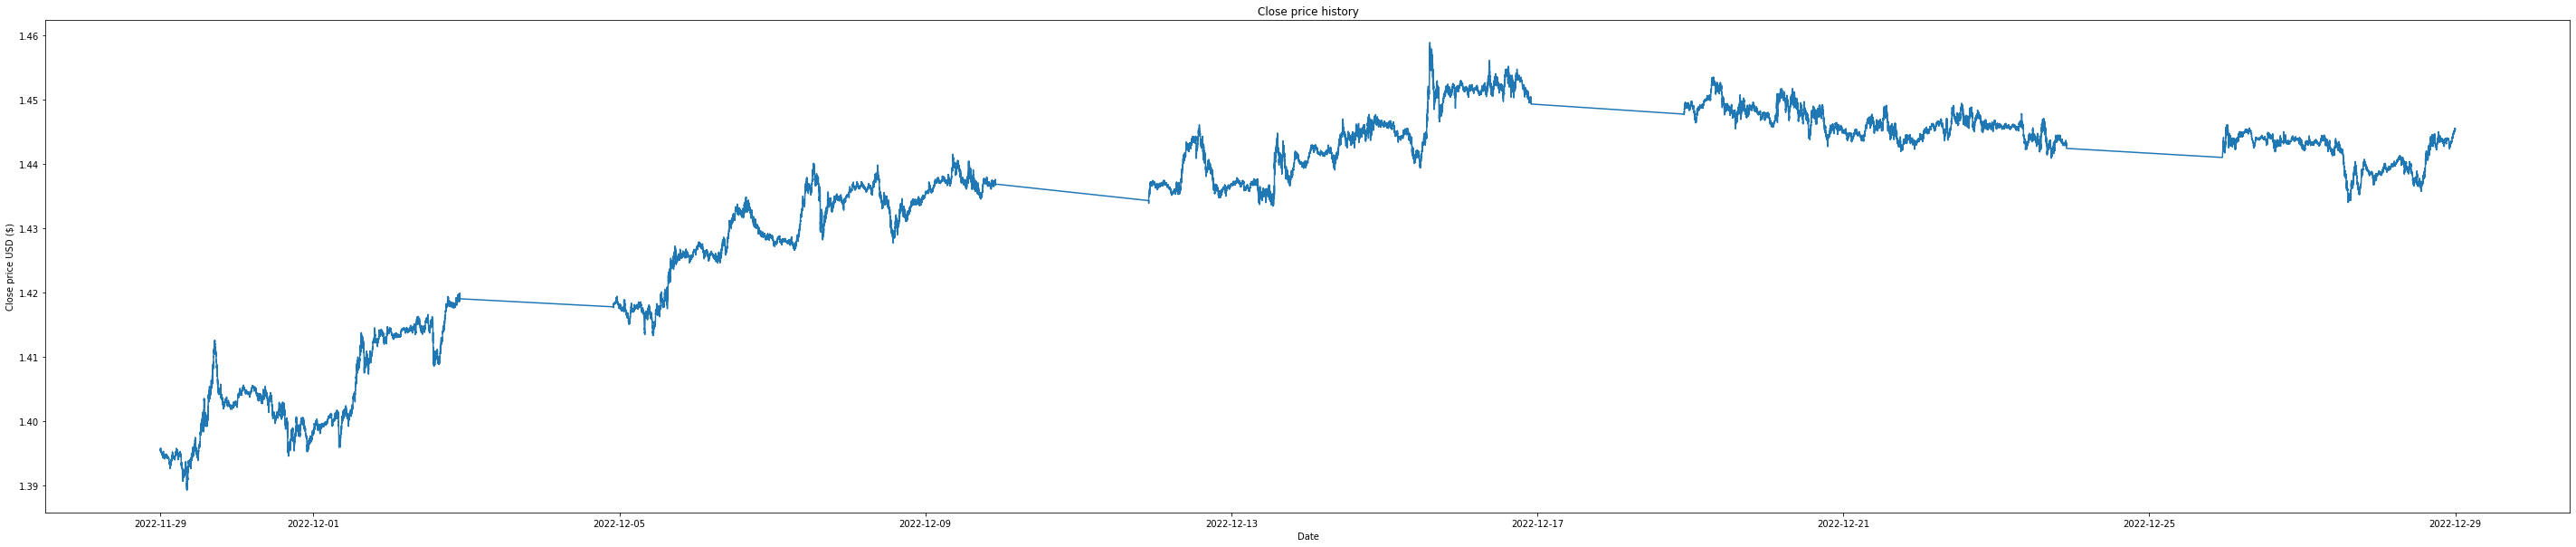

In [ ]:
plt.figure(figsize=(50,10))
plt.title('Close price history')
plt.plot(data['Close'])
plt.xlabel('Date')
plt.ylabel('Close price USD ($)')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = np.asarray(range(1, 10001))
y = data_frame['Close'].head(10000).values

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

X_train= X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [ ]:
print(X_train[:5])

[[8857]
 [1546]
 [8137]
 [7769]
 [7783]]


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
# check classification scores of logistic regression

logreg = LinearRegression()
logreg.fit(X_train, y_train)

print('Train/Test split results:')


# predict the test set using the linear regression model
y_pred = logreg.predict(X_test)

# compute the MSE and MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# print the results
print("Mean squared error:", mse)
print("Mean absolute error:", mae)

Train/Test split results:
Mean squared error: 8.693607356331696e-06
Mean absolute error: 0.0021625358993441236


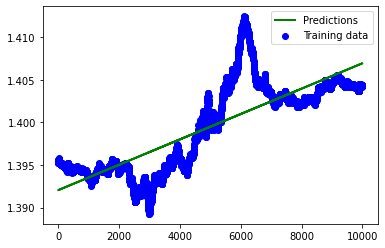

In [ ]:
import matplotlib.pyplot as plt

# predict the test set using the linear regression model
y_pred = logreg.predict(X_test)

# create a scatter plot of the training data
plt.scatter(X_train, y_train, c='blue', label='Training data')

# create a line plot of the predictions
plt.plot(X_test, y_pred, c='green', linewidth=2, label='Predictions')

# add a legend to the plot
plt.legend()

# show the plot
plt.show()

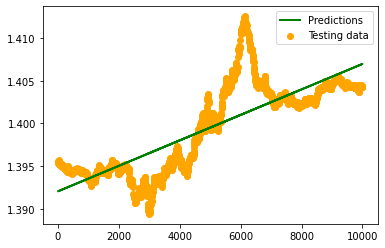

In [ ]:
import matplotlib.pyplot as plt

# predict the test set using the linear regression model
y_pred = logreg.predict(X_test)

# create a scatter plot of the training data
plt.scatter(X_test, y_test, c='orange', label='Testing data')

# create a line plot of the predictions
plt.plot(X_test, y_pred, c='green', linewidth=2, label='Predictions')

# add a legend to the plot
plt.legend()

# show the plot
plt.show()